In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import warnings
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('data\StudentsPerformance.csv')

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\ashwi\AppData\Local\Temp\ipykernel_20760\2277631988.py:1: SyntaxWarning: invalid escape sequence '\S'
  df = pd.read_csv('data\StudentsPerformance.csv')


In [4]:

df.shape

(1000, 8)

In [5]:

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Data checks:
1. Missing values
2. Duplicates
3. Data type
4. No. of unique values in each column
5. Statistics of the dataset
6. Categories in the categorical columns

Missing value check:

In [6]:

df.isna().sum() #no missing values


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

check for duplicates

In [7]:

df.duplicated().sum() #there are no duplicates in the dataset


np.int64(0)

In [8]:
df.info

<bound method DataFrame.info of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none    

Checking number of unique values in cols.

In [10]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

checking stats of dataset

In [11]:
df.describe() #three numerical feature stats are seen

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


1. From the above results we can see that all means are very close to one another for the numerical variables (between 66 - 68.05)
2. All standard deviations are also close to one another (14- 15.19)


Checking for the no. of categorical values in categorical datasets

In [17]:
print("Categories in 'gender' variable:",end="" )
print(df['gender'].unique())

print("\n Categories in 'race_ethnicity' variable:",end="")
print(df['race/ethnicity'].unique())

print("\n Categories in'parental level of education' variable:",end="" )
print(df['parental level of education'].unique())

print("\n Categories in 'lunch' variable:",end="" )
print(df['lunch'].unique())

print("\n Categories in 'test preparation course' variable:",end="" )
print(df['test preparation course'].unique())

Categories in 'gender' variable:['female' 'male']

 Categories in 'race_ethnicity' variable:['group B' 'group C' 'group A' 'group D' 'group E']

 Categories in'parental level of education' variable:["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

 Categories in 'lunch' variable:['standard' 'free/reduced']

 Categories in 'test preparation course' variable:['none' 'completed']


In [18]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
#It allows you to create a formatted string by inserting values into placeholders within the string
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\n We have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [24]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Adding columns for Total score and Avg. score


In [25]:
df['total score']= df['math score']+ df['reading score']+ df['writing score']
df['average']= df['total score'] /3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [30]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


Additional insights

In [31]:

df.groupby('parental level of education').count()

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,total score,average
parental level of education,,,,,,,,,
associate's degree,222,222,222,222,222,222,222,222,222
bachelor's degree,118,118,118,118,118,118,118,118,118
high school,196,196,196,196,196,196,196,196,196
master's degree,59,59,59,59,59,59,59,59,59
some college,226,226,226,226,226,226,226,226,226
some high school,179,179,179,179,179,179,179,179,179


Exploring Data ( Visualization )

Visualize average score distribution to make some conclusion.

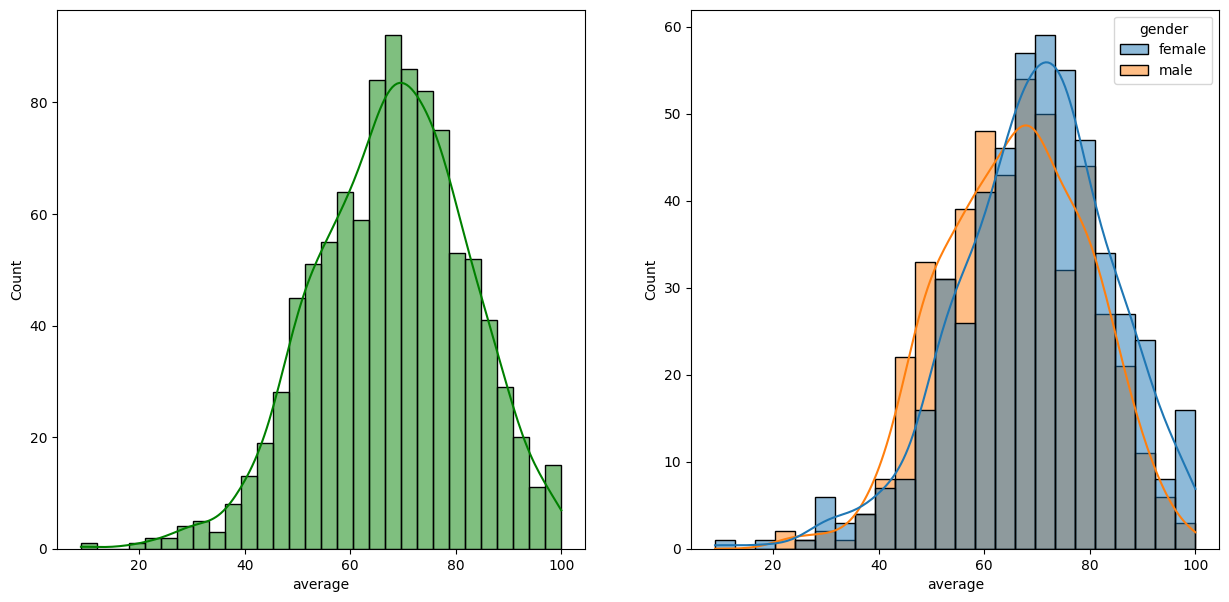

In [43]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7)) #1 row, 2 cols of subplots of size 15*7
plt.subplot(121) #This selects the first subplot in the grid (1 row, 2 columns, 1st subplot).

sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
#kde is kernel density estimatio line to histogram. it plots a smooth line representing the PDF of the variable


plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

#hue is a parameter that allows you to add a third dimension to your 
# plots by color-coding the data points based on another variable

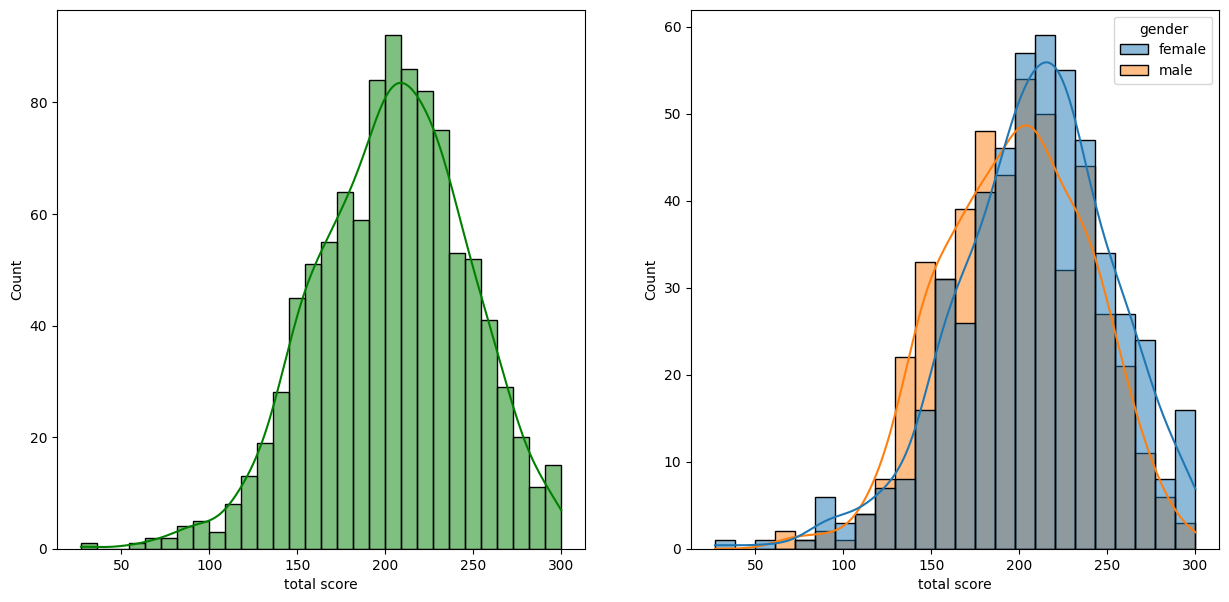

In [44]:

fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

Both charts show that female students perform better than their male counterparts

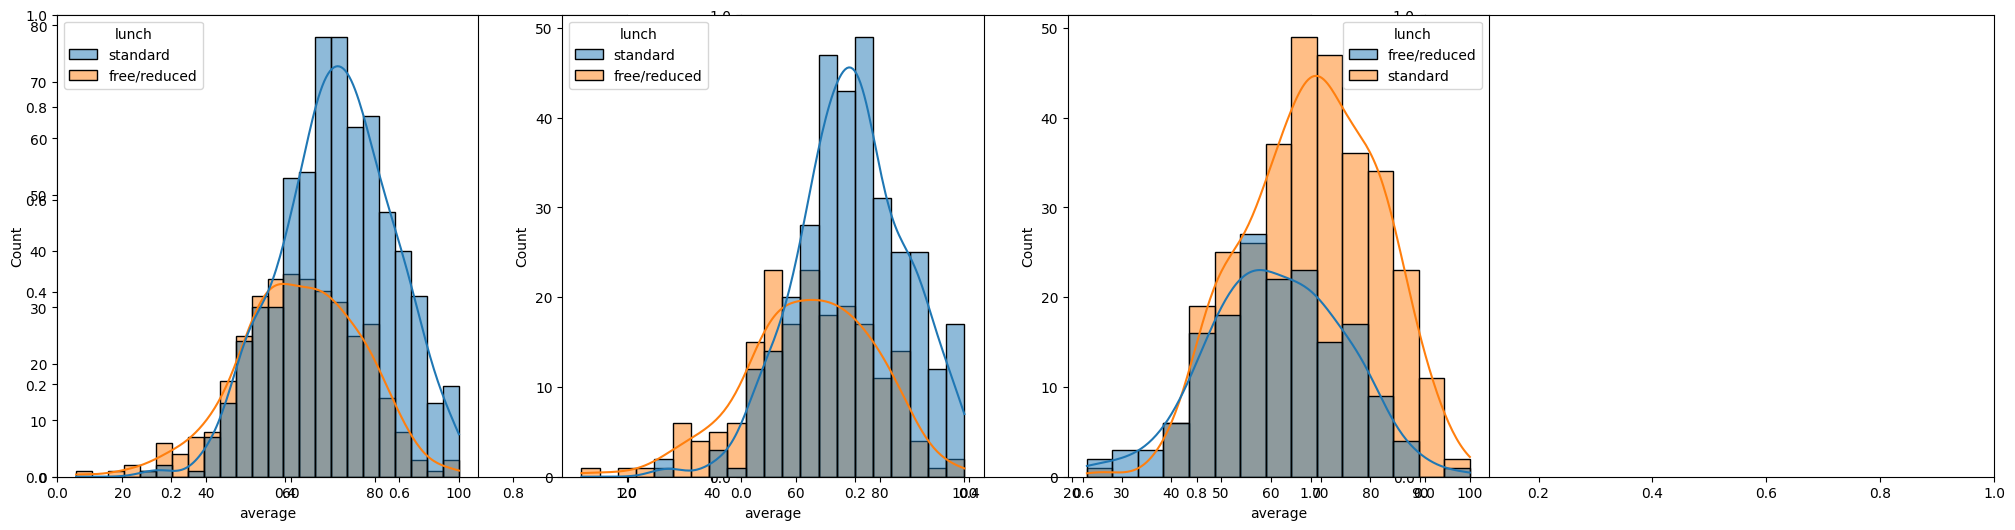

In [45]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

Maximumum score of students in all three subjects

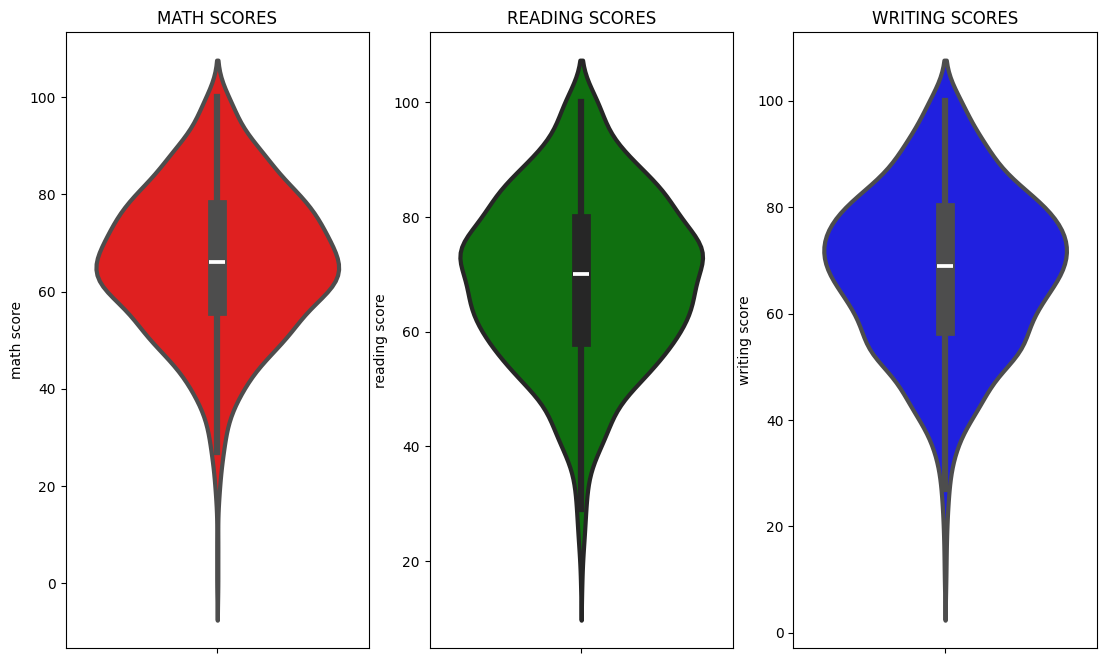

In [47]:

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

CHECKING OUTLIERS

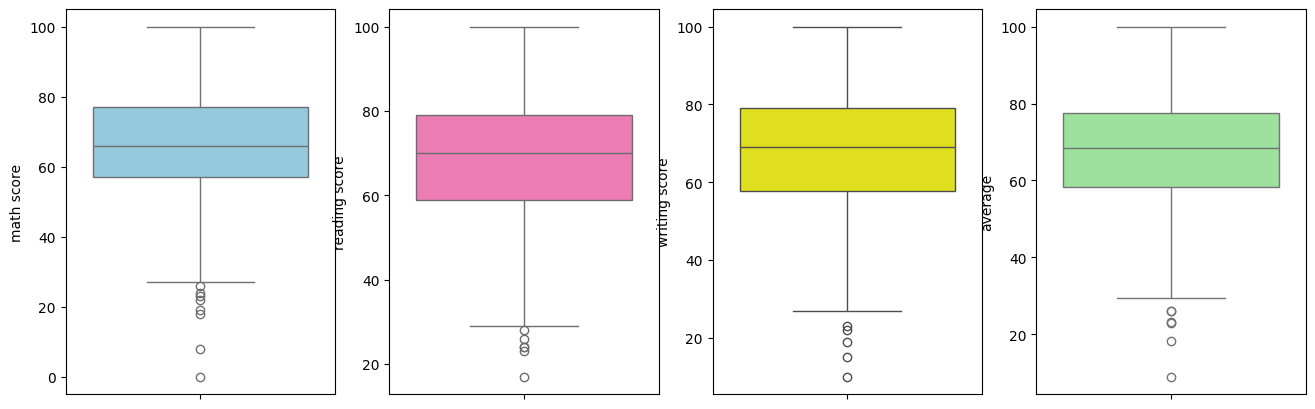

In [51]:

plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()